```html
%TODO: fill in the <repo-name> in the following link to create a link to open the assignment in Google Colab
<a target="_blank" 
  href="https://colab.research.google.com/github/sk-classroom/<repo-name>/blob/main/assignment/assignment.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
```

# Assignment

In this assignment, we will classify nodes based on graph embedding of an airport network. While the airport network is directed, we ignore its directionality and use it its undirected citation networks.

Complete the following tasks and upload your notebook to your GitHub repository.

1. Fill in the black functions, marked by, "\#TODO", in the notebook
2. Update this notebook by using `git add`, `git commit`, and then `git push`.
3. The notebook will be automatically graded, and your score will be shown on GitHub. See [how to check the results on GitHub](https://docs.github.com/en/education/manage-coursework-with-github-classroom/learn-with-github-classroom/view-autograding-results)

Dont's:
- Do not import any libraries except for the ones that are already imported. The grading script will not work if you import additional libraries.
- Do not change the name of the functions. The grading script will not work if you change the name of the functions.
- DO not remove the cells with tag "gradable". If you happen to remove the cells with tag "gradable", recreate the cell and add the tag "gradable" to the cell.

Do's:
- Make the code clearn and easy to understand. Consider using linters & formatters such as `black`. [Youtube: Linters and fixers: never worry about code formatting again (Vim + Ale + Flake8 & Black for Python) by Yong-Yeol Ahn](https://www.youtube.com/watch?v=4FKPySR6HLk)
- You can add additional cells as you like. If you want to include the additional cells in the grading, you need to add the tag "gradable" to the cell. Otherwise, your additional cells will be stripped out when grading. 

## Data preparation

In [28]:
import pandas as pd
import numpy as np
from scipy import sparse

node_table = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/adv-net-sci-course/main/data/airport_network_v2/node_table.csv"
)
edge_table = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/adv-net-sci-course/main/data/airport_network_v2/edge_table.csv",
    dtype={"src": np.int32, "trg": np.int32},
)
src, trg = tuple(edge_table[["src", "trg"]].values.T)

rows, cols = src, trg
nrows, ncols = node_table.shape[0], node_table.shape[0]
A = sparse.csr_matrix(
    (np.ones_like(rows), (rows, cols)),
    shape=(nrows, ncols),
).asfptype()

# Symmterize and binarize
A = A + A.T
A.data = A.data * 0 + 1

# Assignment 1: 
Implement the following function to compute the eigenvector centrality. Then, find the top 10 nodes with the highest centrality. 

Hint:
- Use `scipy.sparse.linalg.eigs` to compute the eigenvector. The returned vector might be a complex number. In this case, take its real part by using `np.real`.
- The sign of an eigenvector is not fixed; it is indefinite, meaning that if a matrix has an eigenvector $u$, then $-u$ is also an eigenvector with the same eigenvalue. Since eigencentrality should always be non-negative, flip the sign of the eigenvector if necessary.

In [29]:

def compute_eigencentrality(A):
    """
    Compute the eigenvector centrality of a network.

    Parameters
    ----------
    A : scipy.sparse.csr_matrix
      Adjacency matrix of the network.

    Returns
    -------
    ec : numpy.ndarray
      Eigenvector centrality of the network.
    """
    # Your code here
    k = ... # number of eigenvalues to compute
    which = ... # which eigenvalues to compute

    eigvals, eigvecs = sparse.linalg.eigs(A, k, which) # compute the eigenvalues and eigenvectors
    ... # take the real part of the eigenvectors
    ... # flip the sign of the eigenvectors if necessary
    return ... # return the eigenvector centrality


In [31]:
ec = compute_eigencentrality(A)
top_node_ids = np.argsort(ec)[::-1][:10]
node_table.query("node_id in @top_node_ids")


,node_id,Airport ID,Name,City,Country,IATA/FAA,ICAO,Latitude,Longitude,Altitude,...,name,alpha-2_y,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
171,171,340,Frankfurt Main,Frankfurt,Germany,FRA,EDDF,50.026421,8.543125,364,...,Germany,DE,276.0,ISO 3166-2:DE,Europe,Western Europe,NaN,150.0,155.0,NaN
176,176,346,Franz Josef Strauss,Munich,Germany,MUC,EDDM,48.353783,11.786086,1487,...,Germany,DE,276.0,ISO 3166-2:DE,Europe,Western Europe,NaN,150.0,155.0,NaN
233,233,507,Heathrow,London,United Kingdom,LHR,EGLL,51.477500,-0.461389,83,...,United Kingdom of Great Britain and Northern I...,GB,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
255,255,580,Schiphol,Amsterdam,Netherlands,AMS,EHAM,52.308613,4.763889,-11,...,Netherlands,NL,528.0,ISO 3166-2:NL,Europe,Western Europe,NaN,150.0,155.0,NaN
537,537,1218,Barcelona,Barcelona,Spain,BCN,LEBL,41.297078,2.078464,12,...,Spain,ES,724.0,ISO 3166-2:ES,Europe,Southern Europe,NaN,150.0,39.0,NaN
544,544,1229,Barajas,Madrid,Spain,MAD,LEMD,40.493556,-3.566764,2000,...,Spain,ES,724.0,ISO 3166-2:ES,Europe,Southern Europe,NaN,150.0,39.0,NaN
591,591,1382,Charles De Gaulle,Paris,France,CDG,LFPG,49.012779,2.550000,392,...,France,FR,250.0,ISO 3166-2:FR,Europe,Western Europe,NaN,150.0,155.0,NaN
665,665,1555,Fiumicino,Rome,Italy,FCO,LIRF,41.804475,12.250797,15,...,Italy,IT,380.0,ISO 3166-2:IT,Europe,Southern Europe,NaN,150.0,39.0,NaN
717,717,1678,Zurich,Zurich,Switzerland,ZRH,LSZH,47.464722,8.549167,1416,...,Switzerland,CH,756.0,ISO 3166-2:CH,Europe,Western Europe,NaN,150.0,155.0,NaN
729,729,1701,Ataturk,Istanbul,Turkey,IST,LTBA,40.976922,28.814606,163,...,Turkey,TR,792.0,ISO 3166-2:TR,Asia,Western Asia,NaN,142.0,145.0,NaN


# Assignment 2 

This is my sincere challenge to your understanding of spectral embedding😬. Don't worry if you feel you don't know what to do, since it is not covered in the class. This is one of the best spectral embedding methods in network science (see [here](https://arxiv.org/abs/2009.05265), [there](https://arxiv.org/abs/2306.13400), and [there](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.88.010801) for instance), and you'll understand how it works by doing completing assignment.  

Implement a spectral embedding using the Laplacian EigenMap method by following the steps below: 

1. Compute the Laplacian matrix defined by 

    $$ 
    L = D - A
    $$

    where, with $d_i$ being the degree of node $i$,  

    $$ 
    D = \begin{pmatrix}
    d_{1} & 0 & 0 & \cdots & 0 \\
    0 & d_{2} & 0 & \cdots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \cdots & d_{n}
    \end{pmatrix}
    $$

    and $A$ is the adjacency matrix.

2. Solve the generalized eigenvalue problem: 

    $$
    L u = \lambda D u
    $$

    where $\lambda$ is the eigenvalue and $u$ is the eigenvector.

3. Choose the $L$ eigenvectors with the smallest **non-zero** eigenvalues. Be sure to exclude the zero (and nearly zero) eigenvalues. 


**Hint**: 
1. The generalized eigenvalue problem can be solved by using `scipy.sparse.linalg.eigs`. Read the documentation carefully to understand how to use it.  
    
**Reference**:
1. https://www2.imm.dtu.dk/projects/manifold/Papers/Laplacian.pdf
2. https://www.cs.cmu.edu/~aarti/Class/10701/slides/Lecture21_1.pdf




In [32]:
import numpy as np
from scipy import sparse

def LaplacianEigenMap(A,  dim):

    """
    Compute the Laplacian EigenMap embedding of a network.

    Parameters
    ----------
    A : scipy.sparse.csr_matrix
      Adjacency matrix of the network.
    dim : int
      Dimension of the embedding.

    Returns
    -------
    embedding : numpy.ndarray (n_nodes, dim)
      Laplacian EigenMap embedding of the network.
    """
    pass

In [27]:
emb = LaplacianEigenMap(A, 32)

Let us visualize the embedding. We will first see that the PCA projection of the embedding appears to be not very discriminative. 

(-0.09217250635508084,
 0.5069203615879575,
 -0.030710808575077405,
 0.40638982858864464)

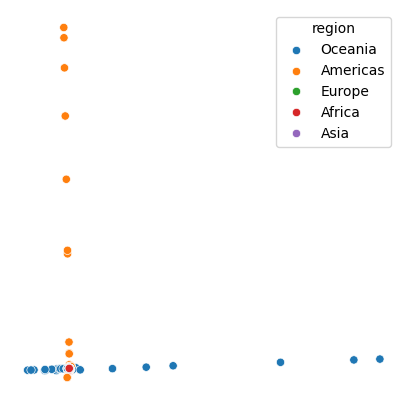

In [30]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

emb_2d = PCA(n_components=2).fit_transform(emb)

fig, ax = plt.subplots(figsize=(5, 5))
df = node_table.assign(x=emb_2d[:, 0], y=emb_2d[:, 1])
ax = sns.scatterplot(x="x", y="y", hue="region", data=df, ax=ax)
ax.axis("off")

Why do the embedding appear to be poor? It's not because the embedding is poor but because the PCA is highly sensitive to outliers. A common way to mitigate the effect of outliers is to normalize the embedding vectors to have unit norm, as demonstrated as follows.  

In [31]:
# Normalize the embedding vectors (each row) to have unit norm
emb_normalized = emb / np.linalg.norm(emb, axis=1, keepdims=True)

where 
- `np.linalg.norm` computes the norm of vectors 
- `axis=1` specifies that the norm is computed for each row
- `keepdims=True` ensures that the output has the same number of dimensions as the input

Let's check the norm of the normalized embedding vectors.

In [33]:
# Check the norm of the normalized embedding vectors
np.linalg.norm(emb_normalized[1])

0.9999999999999999

Let's visualize the normalized embedding vectors using PCA. 

(-0.9487451743879749,
 1.075494134358595,
 -0.977483814070466,
 1.0464112923388054)

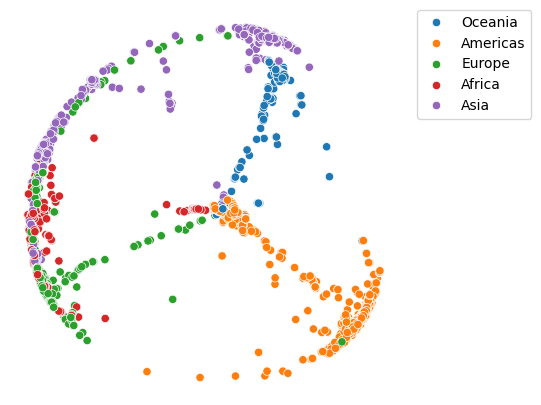

In [35]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

emb_2d = PCA(n_components=2).fit_transform(emb_normalized)

fig, ax = plt.subplots(figsize=(5, 5))
df = node_table.assign(x=emb_2d[:, 0], y=emb_2d[:, 1])
ax = sns.scatterplot(x="x", y="y", hue="region", data=df, ax=ax)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.axis("off")

# Assignment 3

Implement a node clasifier based on a network embedding. You can use any network embedding method you like, any classifier you like and any number of embedding dimensions. 

Your final score will be based on the classification accuracy, with the maximum of 10 points, as follows:

- 2 points for $ 0.6 \leq \text{Accuracy} < 0.7 $
- 4 points for $ 0.7 \leq \text{Accuracy} < 0.8 $
- 6 points for $ 0.8 \leq \text{Accuracy} < 0.9 $
- 8 points for $ 0.9 \leq \text{Accuracy} < 0.95 $
- 10 points for $ \text{Accuracy} \geq 0.95 $


In [36]:
def compute_network_embedding(A):
    """Compute the network embedding of a network.

    Parameters
    ----------
    A : scipy.sparse.csr_matrix
      The adjacency matrix of the network.

    Returns
    -------
    embedding : numpy.ndarray
      The network embedding of the network.
    """
    pass

class NodeClassifier:
    """A model for the node classification task.
    You can use any classifier you want. For instance,
    - sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
    - sklearn.svm.SVC,
    - sklearn.linear_model.LogisticRegression,
    - sklearn.ensemble.RandomForestClassifier, etc.
    """

    def __init__(self):
        pass

    def fit(self, emb, y):
        """Fit the classifier.

        Parameters
        ----------
        emb : numpy.ndarray
          Node embedding matrix. The shape is (n_nodes, dim).
        y : numpy.ndarray
          The shape is (n_train_nodes,).
        """
        pass

    def predict(self, emb):
        """Predict the class of nodes.

        Parameters
        ----------
        emb : numpy.ndarray
          The shape is (n_test_nodes, dim).

        Returns
        -------
        y : numpy.ndarray
          The shape is (n_test_nodes,).
        """
        pass


In [63]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
# benchmarking

def benchmark_node_classification(A, random_state = 42, K_fold = 5):
    """
    Benchmark the node classification task.

    Parameters
    ----------
    A : scipy.sparse.csr_matrix
      The adjacency matrix of the network.
    dim : int
      The dimension of the embedding.
    random_state : int
      The random state for the train-test split.
    K_fold : int
      The number of folds for the cross-validation.

    Returns
    -------
    accuracy : float
      The accuracy of the node classification task.
    """
    # Compute the embedding
    emb = compute_network_embedding(A)

    # Split the node indices into training and testing sets
    node_indices = np.arange(A.shape[0])
    accuracy_list = []
    for train_indices, test_indices in KFold(n_splits=K_fold, shuffle=True, random_state=random_state).split(node_indices):
        # Train
        clf = NodeClassifier()
        clf.fit(emb[train_indices], node_table.loc[train_indices, "region"].values)

        # Predict
        ypred = clf.predict(emb[test_indices])

        # Evaluation
        accuracy = accuracy_score(node_table.loc[test_indices, "region"].values, ypred)
        accuracy_list.append(accuracy)

    return np.mean(accuracy_list)


accuracy = benchmark_node_classification(A)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9600
